# PRÁCTICAS DE REDES NEURONALES ARTIFICIALES (TSCAO): Parte IV

## 4. Redes Neuronales Recurrentes.

Es útil comprender al menos algunos de los conceptos básicos antes de comenzar con la implementación. Una red neuronal recurrente (RNN) procesa secuencias, ya sea precios diarios de acciones, frases o mediciones de sensores, se procesará por ejemplo un elemento por unidad de tiempo (cada vez) y la RNN mientras tanto retendrá en una memoria (llamada estado) lo que ha sucedido previamente en la secuencia.

Recurrente significa que la salida en el paso de tiempo actual se convierte en la entrada al siguiente paso de tiempo. En cada elemento de la secuencia, el modelo considera no solo la entrada actual, sino lo que recuerda acerca de los elementos anteriores.

Esta memoria permite a la red aprender dependencias a largo plazo en una secuencia, lo que significa que puede tener en cuenta todo el contexto al hacer una predicción, ya sea la siguiente palabra en una frase, una clasificación de sentimientos o la próxima medición de temperatura. Una RNN está diseñada para imitar la forma humana de procesar secuencias: consideramos la oración completa al formar una respuesta en lugar de palabras por sí mismas. 

Hoy por hoy las redes más utilizadas y populares son las redes LSTM (Long Short-Term Memory). En el corazón de una red recurrente LSTM hay una capa de celdas de memoria. Estas RNA mantienen un estado de sus celdas tal que la transmisión de la señal entre las neuronas (información en forma de gradiente) no se pierda a medida que se procesa la secuencia. En cada paso de tiempo, la LSTM considera la entrada actual, el "acarreo" y el estado de la celda.

Las celdas de memoria (unidades neuronales) asociadas a la red LSTM tienen 3 puertas y vectores de peso diferentes: hay una puerta para "olvidar" y descartar información irrelevante; una puerta de "entrada" para manejar la entrada actual, y una puerta de "salida" para producir predicciones en cada paso de tiempo. Sin embargo, como señala Chollet, es infructuoso tratar de asignar significados específicos a cada uno de los elementos de la celda.

La función de cada elemento celular de la LSTM se decide en última instancia por los parámetros (pesos) que se aprenden durante el entrenamiento. Debemos de recordar que el beneficio de una red neuronal recurrente para el aprendizaje de secuencias es que mantiene una memoria de toda la secuencia evitando que se pierda información previa.

A continuación, veremos un ejemplo de predicción de bolsa en las acciones de Google.

Lo primero que haremos será cargar el fichero de datos. Usamos pandas para importar el conjunto de datos y la función _iloc_ para crear una matriz que tenga las dimensiones especificadas [:, 1:2] (haremos la predicción sobre la variable Open)

In [1]:
# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importando el conjunto de datos de entrenamiento

training_set = pd.read_csv('Google_Stock_Price_Train.csv')

# Trabajaremos con la columna "Open"

training_set = training_set.iloc[:,1:2].values

Normalizaremos los datos y obtendremos el conjunto de entrada y salida para entrenar nuestra red:

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

# Normalizamos el conjunto de entrenamiento

training_set = sc.fit_transform(training_set)

# Obtenemos el conjunto de entrada a la red y el conjunto de salidas,
# X_train es la entrada, y_train es la salida

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

A continuación, vamos a construir nuestra red LSTM. Para ello lo primero que haremos será importar las librerías y paquetes necesarios como keras, Sequential, Dense y LSTM.

In [17]:
### HAY PROBLEMAS CON VERSIONES DE NUMPY SI ES LA 16, 20 JUNTO CON PYTHON 3
### PARA VER LA VERSION EJECUTAR LO SIGUIENTE
### EL PROBLEMA SE SOLUCIONA INSTALANDO LA ULTIMA VERSION.

## NUMPY 1.21.2
## TENSORFLOW 2.8.0

In [4]:
import numpy
print(numpy.__version__)

import tensorflow
print(tensorflow.__version__)


1.26.4


2025-02-08 14:40:04.315993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739022004.327198  125790 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739022004.330505  125790 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 14:40:04.342781: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.18.0


In [5]:
# Parte 2 - Construyendo La Red Neuronal Recurrente
# Importando las librerías y paquetes

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Inicializando la RNN
# utilizamos un modelo continuo, modelo de regresión

regressor = Sequential()

# Añadimos una capa de entrada y la capa LSTM

regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Añadimos la capa de salida con una única neurona

regressor.add(Dense(units = 1))

# Compilamos la RNN
# usamos el error cuadrático medio
# MSE para la regresión

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustamos la RNN al conjunto de entrenamiento

regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

I0000 00:00:1739022007.553218  125790 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9649 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:05:00.0, compute capability: 8.6
/home/briansenas/Priv-master/SoftComputing/Optimizacion/guiones/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200


I0000 00:00:1739022008.649866  125908 service.cc:148] XLA service 0x73a5900d2ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739022008.649886  125908 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-08 14:40:08.673633: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739022008.774011  125908 cuda_dnn.cc:529] Loaded cuDNN version 90501


38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1038

I0000 00:00:1739022009.099125  125908 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1036
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0874 
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0776 
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0722 
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0688 
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0689 
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0669 
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0612 
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0621 
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0589 
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0582 
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0548 
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0505 
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0502 
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0481 
E

Ahora que hemos entrenado el modelo debemos hacer la predicción y visualización de los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


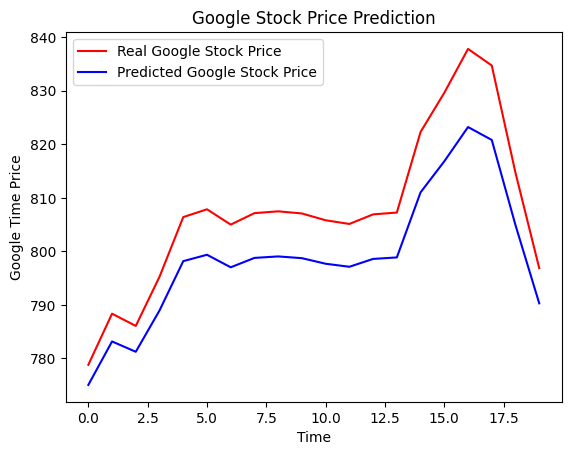

In [7]:
# Parte 3 – Hacer las predicciones y visualizar los resultados

# Obtener el precio real de las acciones de 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values


# Obtener el precio de las acciones previsto para 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
     
                                             
# Visualizando los resultados                                         
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

**Actividad**: A continuación, realizad diferentes pruebas con topologías variadas y con número de entradas distintas, manipulando el conjunto de entrenamiento tanto de salida como de entrada con distintos pasos temporales. Construir una tabla con diferentes configuraciones tanto de aprendizaje como de topologías. Tomar conclusiones de dicha tabla, seleccionar la mejor opción y explicar por qué.

# Experimentar con diferentes arquitecturas

In [1]:
import numpy as np
import pandas as pd
seed = 140421
np.random.seed(seed)

training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values

X_train = training_set[0:1257]
y_train = training_set[1:1258]
print(X_train.shape)
X_train = np.reshape(X_train, (1257, 1,))

(1257, 1)


In [36]:
# To be able to import the sklear-wrapper
# !pip install scikeras
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor


def get_model(
    units: int = 4,
):
    regressor = Sequential()
    regressor.add(Input((None, 1)))
    regressor.add(LSTM(units = units, activation = 'sigmoid'))
    regressor.add(Dense(units = 1))
    return regressor


sk_reg = KerasRegressor(
    get_model, 
    loss="mean_squared_error", 
    optimizer=keras.optimizers.AdamW(),
)

pipe = Pipeline([
    ("scaler", MinMaxScaler(feature_range=(0, 1))), 
    ("model", sk_reg),
])

epochs = 24
param_grid = {
    "regressor__model__model__units": [4, 8, 16, 32],
    "regressor__model__batch_size": [1, 16, 32],
    "regressor__model__epochs": [epochs],
}

fit_params = {
    "model__callbacks": [
        keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=2),
    ]
}
# Use TransformedTargetRegressor to scale y
target_scaler = MinMaxScaler(feature_range=(0, 1))
transformed_pipe = TransformedTargetRegressor(regressor=pipe, transformer=target_scaler)

sk_cv = GridSearchCV(
    transformed_pipe, 
    scoring={
        "mae": make_scorer(mean_absolute_error, greater_is_better=False),
        "mse": make_scorer(mean_squared_error, greater_is_better=False),
    },
    param_grid=param_grid,
    refit="mse",
    n_jobs=-1,
    cv=TimeSeriesSplit(n_splits=3).split(X_train),
)

sk_cv.fit(X_train, y_train, **fit_params)

Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
Epoch 1/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.461179
Epoch 2/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.155624
154/629 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0814Epoch 2/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.35282
Epoch 3/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.277254
114/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2726Epoch 4/24
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4084
Epoch 2/24
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9679
Epoch 2/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1135 
Epoch 3/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2144 9
Epoch 5/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.077447
Epoch 4/24
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.766908
Epoch 3/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1

GridSearchCV(cv=<generator object TimeSeriesSplit._split at 0x73fb639aad50>,
             estimator=TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                                             MinMaxScaler()),
                                                                            ('model',
                                                                             KerasRegressor(loss='mean_squared_error', model=<function get_model at 0x73fb639c5870>, optimizer=<keras.src.optimizers.adamw.AdamW object at 0x73fb6395d7e0>))]),
                                                  transformer=MinMaxScaler()),
             n_jobs=-1,
             param_grid={'regressor__model__batch_size': [1, 16, 32],
                         'regressor__model__epochs': [24],
                         'regressor__model__model__units': [4, 8, 16, 32]},
             refit='mse',
             scoring={'mae': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'mse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')})

In [12]:
import pandas as pd 

with pd.option_context("display.max_columns", None): 
    display(pd.DataFrame(sk_cv.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__model__batch_size,param_regressor__model__epochs,param_regressor__model__model__units,params,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,split0_test_mse,split1_test_mse,split2_test_mse,mean_test_mse,std_test_mse,rank_test_mse
0,24.718592,6.666014,0.439995,0.133492,1,24,4,"{'regressor__model__batch_size': 1, 'regressor...",-60.410726,-8.386047,-42.008464,-36.935079,21.539827,5,-5487.727230,-158.378410,-2025.879018,-2557.328219,2207.912801,5
1,24.651837,6.689604,0.423723,0.139583,1,24,8,"{'regressor__model__batch_size': 1, 'regressor...",-47.984741,-6.581920,-34.194577,-29.587079,17.213758,3,-3615.964036,-100.425849,-1345.696679,-1687.362188,1455.404566,3
2,25.736111,5.547495,0.402203,0.103754,1,24,16,"{'regressor__model__batch_size': 1, 'regressor...",-25.276376,-6.413951,-19.241598,-16.977309,7.865241,2,-1042.589278,-97.026607,-461.709406,-533.775097,389.373248,2
3,25.920708,6.013347,0.419333,0.190448,1,24,32,"{'regressor__model__batch_size': 1, 'regressor...",-14.440380,-6.208386,-8.586182,-9.744982,3.459147,1,-368.022595,-94.683488,-132.550869,-198.418984,120.920148,1
4,4.560700,0.803059,0.303979,0.003529,16,24,4,"{'regressor__model__batch_size': 16, 'regresso...",-129.523506,-125.373844,-210.612381,-155.169910,39.240333,11,-19376.713922,-16949.985254,-45292.881130,-27206.526769,12827.299367,11
5,4.508506,0.900767,0.337214,0.020256,16,24,8,"{'regressor__model__batch_size': 16, 'regresso...",-137.958026,-113.396571,-96.082990,-115.812529,17.180557,8,-21943.919268,-13924.807613,-9540.311762,-15136.346214,5135.707619,7
6,4.485237,0.822318,0.298155,0.014981,16,24,16,"{'regressor__model__batch_size': 16, 'regresso...",-111.689421,-24.053202,-68.210357,-67.984327,35.777693,6,-14395.733707,-712.370957,-4854.350337,-6654.151667,5729.343631,6
7,4.707741,1.021524,0.311427,0.031949,16,24,32,"{'regressor__model__batch_size': 16, 'regresso...",-76.629447,-17.451731,-13.547318,-35.876165,28.860972,4,-6853.572313,-410.029910,-254.893035,-2506.165086,3074.733491,4
8,3.851599,0.241733,0.319292,0.031181,32,24,4,"{'regressor__model__batch_size': 32, 'regresso...",-170.369772,-164.191664,-222.032846,-185.531427,25.933343,12,-32717.865038,-28133.472757,-50283.311448,-37044.883081,9546.243672,12
9,3.615144,0.398582,0.312229,0.020945,32,24,8,"{'regressor__model__batch_size': 32, 'regresso...",-176.041499,-112.743346,-146.465620,-145.083489,25.859837,10,-34561.653329,-13750.397958,-21947.804001,-23419.951763,8559.692432,10


In [13]:
print(sk_cv.best_params_, sk_cv.best_score_, )

{'regressor__model__batch_size': 1, 'regressor__model__epochs': 24, 'regressor__model__model__units': 32} -198.41898395710072


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


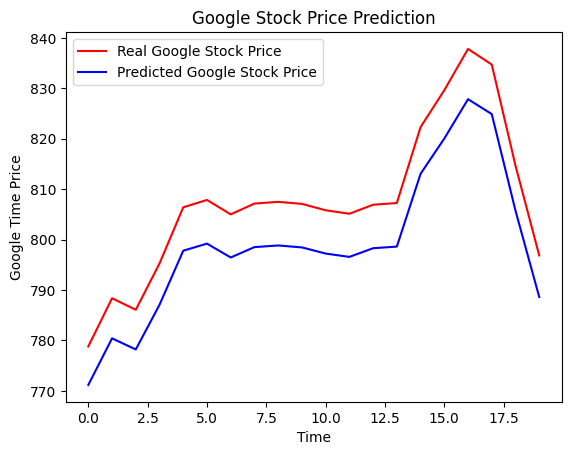

In [14]:
import matplotlib.pyplot as plt 
# Obtener el precio real de las acciones de 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values

# Obtener el precio de las acciones previsto para 2017
inputs = real_stock_price
predicted_stock_price = sk_cv.best_estimator_.predict(inputs)
                                             
# Visualizando los resultados                                         
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

Observamos que incrementar el número de unidades ocultas ha aumentado significativamente la calidad del ajuste. Obteniente una notable diferencia cuanod nos acercamos al "Time=16" donde vemos que la línea azul sigue más cerca a la roja en comparación al modelo obtenido anteriormente. Es posible que seguir incrementando la complejidad del modelo, el número de épocas y haciendo uso de otras técnicas podamos obtener mejores resultados.